# LOAD DATA

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json di sini

## Data

In [ ]:
# Persiapan kredensial Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download and unzip the dataset from Kaggle
!kaggle datasets download -d utkarshsharma11r/student-mental-health-analysis -p /content/datasets --unzip

Dataset URL: https://www.kaggle.com/datasets/utkarshsharma11r/student-mental-health-analysis
License(s): CC0-1.0
  0% 0.00/10.5k [00:00<?, ?B/s]
100% 10.5k/10.5k [00:00<00:00, 47.4MB/s]


# IMPORT LIBRARY

In [ ]:
!pip install langchain_community
!pip install replicate
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
from langchain_community.llms import Replicate
import os
from google.colab import userdata
# Set the API token
api_token = userdata.get('api_token')
os.environ["REPLICATE_API_TOKEN"] = api_token
# Model setup
model = "ibm-granite/granite-3.3-8b-instruct"
output = Replicate(
model=model,
replicate_api_token=api_token,
)

# EXPLORATORY DATA ANALYSIS

In [ ]:
df = "/content/datasets/Student Mental Health Analysis During Online Learning.csv"
df = pd.read_csv(df)

In [ ]:
# Preview the data
df.head()

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,Male,15,Class 8,7.1,8.9,9.3,Medium,No,Same
1,Meera,Female,25,MSc,3.3,5.0,0.2,Medium,No,Same
2,Ishaan,Male,20,BTech,9.5,5.4,6.2,Medium,No,Same
3,Aditya,Male,20,BA,10.8,5.6,5.5,High,Yes,Same
4,Anika,Female,17,Class 11,2.8,5.4,3.1,Medium,Yes,Same


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1000 non-null   object 
 1   Gender                        1000 non-null   object 
 2   Age                           1000 non-null   int64  
 3   Education Level               1000 non-null   object 
 4   Screen Time (hrs/day)         1000 non-null   float64
 5   Sleep Duration (hrs)          1000 non-null   float64
 6   Physical Activity (hrs/week)  1000 non-null   float64
 7   Stress Level                  1000 non-null   object 
 8   Anxious Before Exams          1000 non-null   object 
 9   Academic Performance Change   1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


Cek nilai NaN disetiap kolom dan drop kolom "Name" pada dataset.

In [ ]:
# Cek apakah ada nilai NaN di setiap kolom
nan_counts = df.isnull().sum()
print("Jumlah nilai NaN di setiap kolom:")
print(nan_counts)

# Drop kolom 'Name'
df.drop(columns=['Name'], inplace=True)

Jumlah nilai NaN di setiap kolom:
Name                            0
Gender                          0
Age                             0
Education Level                 0
Screen Time (hrs/day)           0
Sleep Duration (hrs)            0
Physical Activity (hrs/week)    0
Stress Level                    0
Anxious Before Exams            0
Academic Performance Change     0
dtype: int64


Mengacak data dan mengambil 500 baris pertama dari data sebagai data untuk dianalisis dan dikonversi ke string.

In [ ]:
# Shuffle data dan ambil 500 baris pertama
shuffled_df = df.sample(frac=1, random_state=42).head(500)

# Konversi ke teks
table_text = shuffled_df.to_string(index=False)

In [ ]:
# --- Statistik Deskriptif ---
print("Statistik Deskriptif Numerik:")
shuffled_df.describe()

Statistik Deskriptif Numerik:


,Age,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week)
count,500.000000,500.000000,500.000000,500.000000
mean,20.178000,7.025200,6.451800,5.100000
std,3.467906,2.952504,1.473553,2.920236
min,15.000000,2.000000,4.000000,0.000000
25%,17.000000,4.500000,5.100000,2.700000
50%,20.000000,7.100000,6.500000,5.200000
75%,23.000000,9.700000,7.700000,7.525000
max,26.000000,12.000000,9.000000,10.000000


In [ ]:
print("\nStatistik Deskriptif Kategorikal:")
shuffled_df.describe(include='object')



Statistik Deskriptif Kategorikal:


,Gender,Education Level,Stress Level,Anxious Before Exams,Academic Performance Change
count,500,500,500,500,500
unique,3,11,3,2,3
top,Male,MTech,Medium,Yes,Same
freq,243,69,251,259,196


In [ ]:
# --- Encoding Kolom Kategorikal untuk Korelasi ---
df_encoded = shuffled_df.copy()
categorical_cols = ['Stress Level', 'Gender', 'Academic Performance Change']
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = dict(zip(le.classes_, le.transform(le.classes_)))


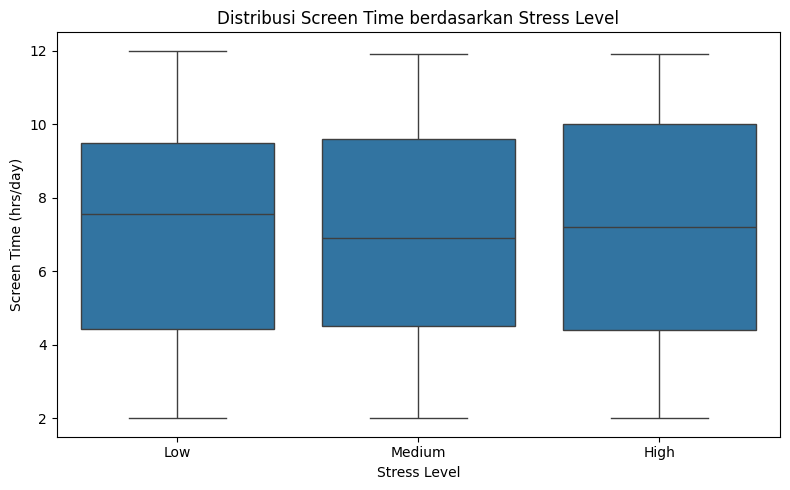

In [ ]:
# --- Boxplot: Screen Time vs Stress Level ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='Stress Level', y='Screen Time (hrs/day)', data=shuffled_df)
plt.title('Distribusi Screen Time berdasarkan Stress Level')
plt.tight_layout()
plt.show()

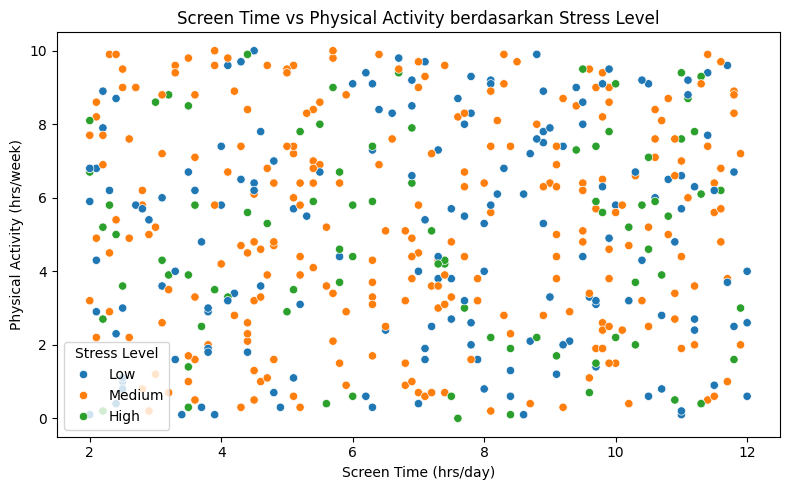

In [ ]:
# --- Scatterplot: Screen Time vs Physical Activity ---
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Screen Time (hrs/day)',
    y='Physical Activity (hrs/week)',
    hue='Stress Level',
    data=shuffled_df
)
plt.title('Screen Time vs Physical Activity berdasarkan Stress Level')
plt.tight_layout()
plt.show()

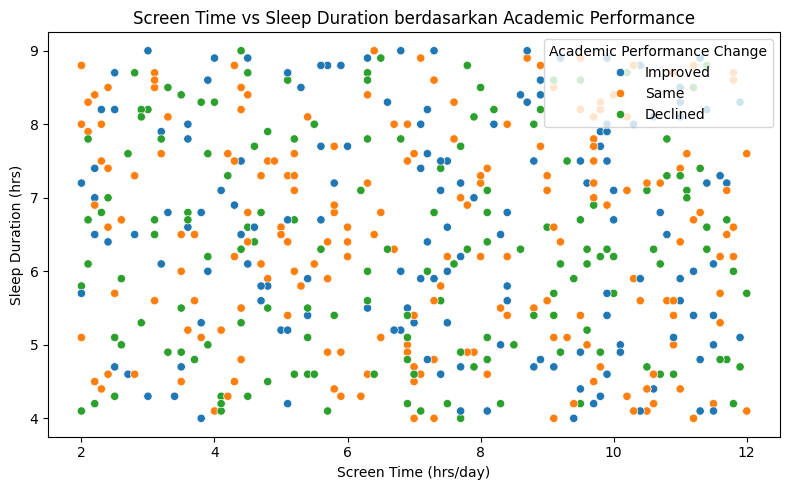

In [ ]:
# --- Scatterplot: Screen Time vs Academic Performance Change (encoded) ---
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x='Screen Time (hrs/day)',
    y='Sleep Duration (hrs)',
    hue='Academic Performance Change',
    data=shuffled_df
)
plt.title('Screen Time vs Sleep Duration berdasarkan Academic Performance')
plt.tight_layout()
plt.show()

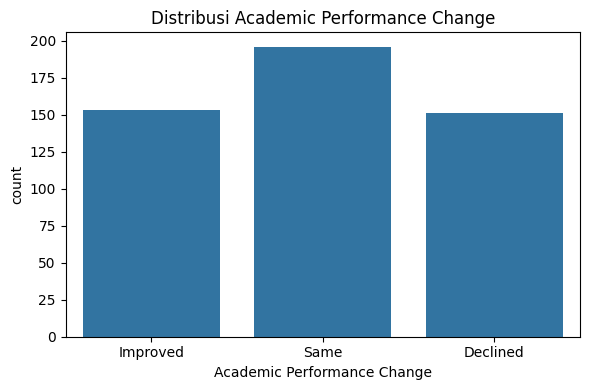

In [ ]:
# --- Barplot: Academic Performance Change ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Academic Performance Change', data=shuffled_df)
plt.title('Distribusi Academic Performance Change')
plt.tight_layout()
plt.show()

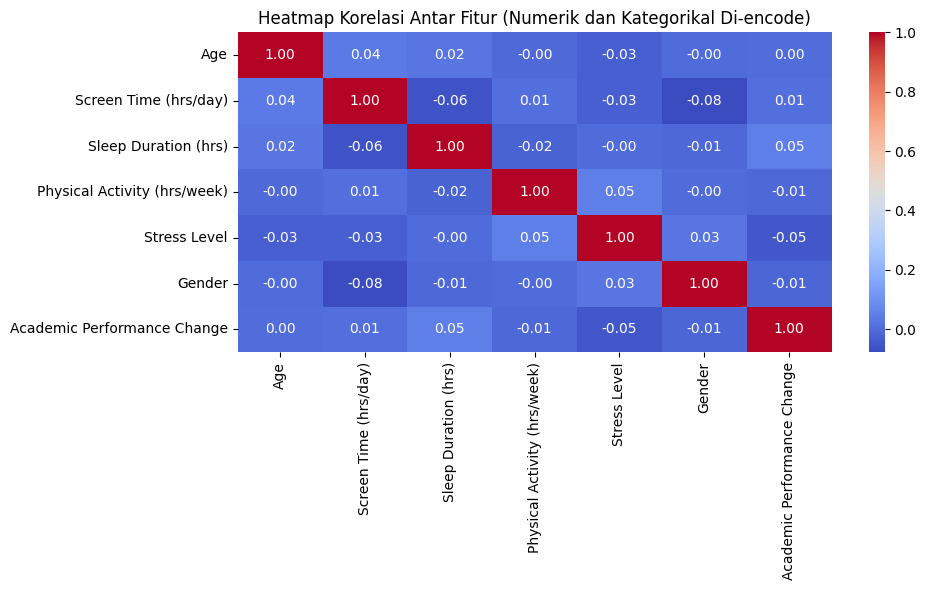

In [ ]:

# Pilih hanya kolom numerik dan kolom kategorikal yang sudah di-encode
cols_to_use = ['Age', 'Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)'] + categorical_cols

# Buat subset dataframe untuk korelasi
df_corr = df_encoded[cols_to_use]

# Plot heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Fitur (Numerik dan Kategorikal Di-encode)")
plt.tight_layout()
plt.show()

In [ ]:
preview_lines = table_text.split('\n')[:10]  # ambil 10 baris pertama
preview_text = '\n'.join(preview_lines)
print(preview_text)

Gender  Age Education Level  Screen Time (hrs/day)  Sleep Duration (hrs)  Physical Activity (hrs/week) Stress Level Anxious Before Exams Academic Performance Change
  Male   22             BSc                    7.5                   5.3                           2.7          Low                   No                    Improved
  Male   15         Class 9                    8.0                   7.2                           4.0          Low                   No                        Same
  Male   17        Class 10                    5.1                   7.3                           9.6       Medium                   No                        Same
Female   16        Class 10                   10.4                   8.8                           3.2       Medium                  Yes                    Improved
  Male   19        Class 12                    3.1                   8.7                           7.2       Medium                   No                        Same
  Male   1

# ANALYSIS PROCESS WITH IBM GRANITE

Melakukan list dan eksplorasi dari setiap nilai yang unik(tidak duplikat) pada kolom fitur Gender, Age, Education Level, Stress Level, Anxious Before Exams, dan Academic Performance Change.

In [ ]:
# Define refined prompt
refined_prompt = f"""
List every unique value in every feature in the Data except Screen Time (hrs/day), Sleep Duration (hrs), and  Physical Activity (hrs/week)
Data:
{table_text}
"""
# Invoke the model with the example prompt
response = output.invoke(refined_prompt)

# Print the response
print("Student Well-being and Academic Performance Analysis:\n")
print(response)


Student Well-being and Academic Performance Analysis:

### Unique Values in Each Feature (Excluding Screen Time, Sleep Duration, and Physical Activity)

**Gender:**
- Male
- Female
- Other

**Age:**
- 15
- 16
- 17
- 18
- 19
- 20
- 21
- 22
- 23
- 24
- 25
- 26

**Education Level:**
- Class 8
- Class 9
- Class 10
- Class 11
- Class 12
- BSc
- MA
- MTech
- MSc
- BA
- BTech

**Stress Level:**
- Low
- Medium
- High
- Other

**Anxious Before Exams:**
- No
- Yes

**Academic Performance Change:**
- Improved
- Same
- Declined

### Note:
The specified features exclude "Screen Time (hrs/day)", "Sleep Duration (hrs)", and "Physical Activity (hrs/week)" as requested. Each unique value within the remaining features has been listed above. The dataset contains a mix of categorical and binary features, with "Education Level" having multiple categories and "Stress Level" and "Anxious Before Exams" being binary. The "Academic Performance Change" reflects a qualitative outcome.


Melakukan list dan eksplorasi dari setiap nilai yang unik(tidak duplikat) pada kolom fitur Screen Time (hrs/day) dengan aturan rounded dan melihat berapa nilai minimal dan maksimalnya.

In [ ]:
# Set model parameters for prompting with default values
parameters = {
 "top_k": 0,
 "top_p": 0,
 "max_tokens": 128,
 "min_tokens": 0,
 "random_seed": None,
 "repetition_penalty": 1.5,
 "stopping_criteria": "length (256 tokens)",
 "stopping_sequence": 256
}

# Define refined prompt
refined_prompt = f"""
You are given a dataset. Focus only on the following three numeric features:
- Screen Time (hrs/day)

Your task:
1. Apply this rounding rule to each value:
   - If the decimal is less than 0.5, round it down to the nearest whole number.
   - If the decimal is exactly 0.5, keep it as is (e.g., 6.5 remains 6.5).
   - If the decimal is greater than 0.5, round it up to the nearest whole number.

3. From the rounded values, return with no duplicates.

4. For each feature, show the following:
   - Rounded (unique): [list of unique rounded values]
   - Min: minimum value from the rounded list
   - Max: maximum value from the rounded list

Here is the dataset:
{table_text}
"""
# Invoke the model with the example prompt
response = output.invoke(refined_prompt, parameters=parameters)

# Print the response
print("Rounded Unique Values with Min/Max for Numeric Features:\n")
print(response)


Rounded Unique Values with Min/Max for Numeric Features:

### Rounded Screen Time (hrs/day) with Unique Values:

1. **Unique Rounded Values:** [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

2. **Min:** 2

3. **Max:** 30

### Explanation:

- Each value from the 'Screen Time (hrs/day)' column was rounded according to the specified rules.
- The unique rounded values were extracted, removing duplicates.
- The minimum and maximum values from this list were calculated to provide the range of rounded screen times.

Note: The dataset provided contains a wide range of screen times, with some values exceeding typical daily hours, possibly due to reporting errors or non-standard usage patterns. The analysis reflects these raw numbers as given without further context or correction.


Melakukan list dan eksplorasi dari setiap nilai yang unik(tidak duplikat) pada kolom fitur Sleep Duration (hrs) dengan aturan rounded dan melihat berapa nilai minimal dan maksimalnya.

In [ ]:
# Set model parameters for prompting with default values
parameters = {
 "top_k": 0,
 "top_p": 0,
 "max_tokens": 128,
 "min_tokens": 0,
 "random_seed": None,
 "repetition_penalty": 1.5,
 "stopping_criteria": "length (256 tokens)",
 "stopping_sequence": 256
}

# Define refined prompt
refined_prompt = f"""
You are given a dataset. Focus only on the following three numeric features:
- Sleep Duration (hrs)

Your task:
1. Apply this rounding rule to each value:
   - If the decimal is less than 0.5, round it down to the nearest whole number.
   - If the decimal is exactly 0.5, keep it as is (e.g., 6.5 remains 6.5).
   - If the decimal is greater than 0.5, round it up to the nearest whole number.

3. From the rounded values, return with no duplicates.

4. For each feature, show the following:
   - Rounded (unique): [list of unique rounded values]
   - Min: minimum value from the rounded list
   - Max: maximum value from the rounded list

Here is the dataset:
{table_text}
"""
# Invoke the model with the example prompt
response = output.invoke(refined_prompt, parameters=parameters)

# Print the response
print("Rounded Unique Values with Min/Max for Numeric Features:\n")
print(response)


Rounded Unique Values with Min/Max for Numeric Features:

### Rounded Sleep Duration (unique) and Summary Statistics

**Feature: Sleep Duration (hrs)**

1. **Rounded (unique):**
   - [4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5, 5.0, 5.1, 5.2, 5.3, 5.4, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.5, 6.6, 6.7, 6.7, 6.8, 6.8, 6.9, 7, 7.0, 7.1, 7.2, 7.2, 7.3, 7.3, 7.4, 7.4, 7.5, 7.6, 7.6, 7.7, 7.7, 7.8, 7.8, 7.9, 8, 8.0, 8.1, 8.1, 8.2, 8.2, 8.3, 8.4, 8.4, 8.5, 8.5, 8.6, 8.7, 8.7, 8.8, 8.8, 8.9, 9, 9.0, 9.1, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.7, 9.8, 9.8, 9.9, 10, 10.0, 10.0, 10.2, 10.3, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 


Melakukan list dan eksplorasi dari setiap nilai yang unik(tidak duplikat) pada kolom fitur Physical Activity (hrs/week) dengan aturan rounded dan melihat berapa nilai minimal dan maksimalnya.

In [ ]:
# Set model parameters for prompting with default values
parameters = {
 "top_k": 0,
 "top_p": 0,
 "max_tokens": 256,
 "min_tokens": 0,
 "random_seed": None,
 "repetition_penalty": 1.5,
 "stopping_criteria": "length (256 tokens)",
 "stopping_sequence": 128
}

# Define refined prompt
refined_prompt = f"""
You are given a dataset. Focus only on the following three numeric features:
- Physical Activity (hrs/week)

Your task:
1. Apply this rounding rule to each value:
   - If the decimal is less than 0.5, round it down to the nearest whole number.
   - If the decimal is exactly 0.5, keep it as is (e.g., 6.5 remains 6.5).
   - If the decimal is greater than 0.5, round it up to the nearest whole number.

3. From the rounded values, return with no duplicates.

4. For each feature, show the following:
   - Rounded (unique): [list of unique rounded values]
   - Min: minimum value from the rounded list
   - Max: maximum value from the rounded list

Here is the dataset:
{table_text}
"""
# Invoke the model with the example prompt
response = output.invoke(refined_prompt, parameters=parameters)

# Print the response
print("Rounded Unique Values with Min/Max for Numeric Features:\n")
print(response)


Rounded Unique Values with Min/Max for Numeric Features:

### Rounded Physical Activity (hrs/week) with Unique Values, Minimum, and Maximum

**Rounded (unique):** [0, 0.5, 2, 2.5, 3, 3.1, 3.2, 3.6, 3.7, 3.8, 3.9, 4, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5, 5.0, 5.1, 5.2, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.7, 6.8, 7, 7.0, 7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.8, 7.9, 8, 8.0, 8.1, 8.2, 8.3, 8.4, 8.6, 8.7, 8.8, 8.9, 9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10, 10.0, 10.0, 10.2, 10.3, 10.4, 10.5, 10.6, 10.8, 10.9, 11, 11.0, 11.0, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9]

**Min:** 0

**Max:** 11.9

### Ex


Analisis korelasi antara fitur "Screen Time (hrs/day)" dengan Stress Level (Low, Medium, High) dan Academic Performance Change (Improved, Same, Declined).

In [ ]:
# Set model parameters for prompting with default values
parameters = {
    "top_k": 0,
    "top_p": 0,
    "max_tokens": 1024,
    "min_tokens": 0,
    "random_seed": None,
    "repetition_penalty": 1.0,
    "stopping_criteria": "length (512 tokens)",
    "stopping_sequence": None
}

# Define refined prompt
refined_prompt = f"""
You are an AI data analyst. From the following dataset, analyze how "Screen Time (hrs/day)" is correlated with:

1. Stress Level (Low, Medium, High)
2. Academic Performance Change (Improved, Same, Declined)

Your task:
- Identify patterns or insights: Does higher Screen Time correlate with higher stress or poorer academic outcomes?
- Write your findings in clear natural language, including data-driven reasoning.
- Focus only on analysis, interpretation, and insight summary.

Here is the dataset:
{table_text}
"""

# Invoke the model with the prompt and parameters
response = output.invoke(refined_prompt, parameters=parameters)

# Print the result
print("Screen Time Correlation with Stress Level and Academic Performance:\n")
print(response)


Screen Time Correlation with Stress Level and Academic Performance:

### Analysis of Screen Time (hrs/day) Correlation with Stress Level and Academic Performance Change

#### 1. Screen Time and Stress Level

Upon analyzing the dataset, there is a noticeable trend suggesting a correlation between higher screen time and increased stress levels. Here's a breakdown:

- **High Stress Group:** The highest screen times (10.6 hrs/day, 11.0 hrs/day, 11.5 hrs/day) are observed in individuals reporting high stress levels.
- **Medium Stress Group:** Many individuals in the medium stress category also exhibit relatively high screen times (7.7 hrs/day, 8.9 hrs/day, 9.9 hrs/day).
- **Low Stress Group:** Lower screen times (2.2 hrs/day, 2.6 hrs/day, 3.1 hrs/day) are predominant among those reporting low stress.

While correlation does not imply causation, the data suggests that higher screen time may be associated with elevated stress levels. This pattern is consistent across various age groups and ed

Analisis korelasi antara fitur "Sleep Duration (hrs)" dengan Stress Level (Low, Medium, High) dan Academic Performance Change (Improved, Same, Declined).

In [ ]:
# Set model parameters for prompting with default values
parameters = {
    "top_k": 0,
    "top_p": 0,
    "max_tokens": 1024,
    "min_tokens": 0,
    "random_seed": None,
    "repetition_penalty": 1.0,
    "stopping_criteria": "length (512 tokens)",
    "stopping_sequence": None
}

# Define refined prompt
refined_prompt = f"""
You are an AI data analyst. From the following dataset, analyze how "Sleep Duration (hrs)" is correlated with:

1. Stress Level (Low, Medium, High)
2. Academic Performance Change (Improved, Same, Declined)

Your task:
- Identify patterns or insights: Does higher Screen Time correlate with higher stress or poorer academic outcomes?
- Write your findings in clear natural language, including data-driven reasoning.
- Focus only on analysis, interpretation, and insight summary.

Here is the dataset:
{table_text}
"""

# Invoke the model with the prompt and parameters
response = output.invoke(refined_prompt, parameters=parameters)

# Print the result
print("Screen Time Correlation with Stress Level and Academic Performance:\n")
print(response)


Screen Time Correlation with Stress Level and Academic Performance:

### Analysis of Sleep Duration Correlation with Stress Level and Academic Performance Change

#### Correlation with Stress Level

1. **High Sleep Duration and Low Stress**: Individuals with higher sleep durations (8+ hours) tend to report lower stress levels, as seen in several cases, such as:
   - Female, Age 25, MSc, Sleep Duration 7.2 hours, Stress Level Low
   - Female, Age 26, MA, Sleep Duration 6.8 hours, Stress Level Low
   - Male, Age 15, Class 9, Sleep Duration 4.3 hours, Stress Level Low

2. **Lower Sleep Duration and Higher Stress**: Conversely, individuals with lower sleep durations (less than 6 hours) are more likely to report higher stress levels:
   - Male, Age 26, MSc, Sleep Duration 2.2 hours, Stress Level High
   - Male, Age 23, MA, Sleep Duration 3.8 hours, Stress Level High
   - Female, Age 15, Class 9, Sleep Duration 2.4 hours, Stress Level Low (though reported as Medium)

3. **Moderate Sleep Dura

Analisis korelasi antara fitur "Physical Activity (hrs/week)" dengan Stress Level (Low, Medium, High) dan Academic Performance Change (Improved, Same, Declined).

In [ ]:
# Set model parameters for prompting with default values
parameters = {
    "top_k": 0,
    "top_p": 0,
    "max_tokens": 1024,
    "min_tokens": 0,
    "random_seed": None,
    "repetition_penalty": 1.0,
    "stopping_criteria": "length (512 tokens)",
    "stopping_sequence": None
}

# Define refined prompt
refined_prompt = f"""
You are an AI data analyst. From the following dataset, analyze how "Physical Activity (hrs/week)" is correlated with:

1. Stress Level (Low, Medium, High)
2. Academic Performance Change (Improved, Same, Declined)

Your task:
- Identify patterns or insights: Does higher Screen Time correlate with higher stress or poorer academic outcomes?
- Write your findings in clear natural language, including data-driven reasoning.
- Focus only on analysis, interpretation, and insight summary.

Here is the dataset:
{table_text}
"""

# Invoke the model with the prompt and parameters
response = output.invoke(refined_prompt, parameters=parameters)

# Print the result
print("Screen Time Correlation with Stress Level and Academic Performance:\n")
print(response)


Screen Time Correlation with Stress Level and Academic Performance:

### Analysis of Correlation Between Physical Activity and Stress Level/Academic Performance Change

#### Correlation with Stress Level

1. **High Stress Level**: Individuals reporting high stress levels tend to engage in less physical activity, with an average of 2.8 hours/week compared to the overall average of 5.8 hours/week. This suggests that higher physical activity might be associated with lower stress levels.

2. **Medium Stress Level**: Those experiencing medium stress levels show varying physical activity, ranging from 0.1 to 11.2 hours/week. There's no clear trend indicating a direct relationship between medium stress and physical activity.

3. **Low Stress Level**: Individuals with low stress levels also display a wide range of physical activity, from 0.0 to 11.7 hours/week. Similar to medium stress, no clear correlation is evident.

**Insight**: While there's variability, the tendency for higher stress to 

Kesimpulan dan Insight yang didapatkan dari dataset yang ada

In [ ]:
# Set model parameters for prompting with default values
parameters = {
    "top_k": 0,
    "top_p": 0,
    "max_tokens": 1024,
    "min_tokens": 0,
    "random_seed": None,
    "repetition_penalty": 1.0,
    "stopping_criteria": "length (512 tokens)",
    "stopping_sequence": None
}

# Define refined prompt for conclusion
refined_prompt = f"""
You are a data analyst. Based on the dataset provided below, which examines the relationship between:

- Screen Time (hrs/day)
- Stress Level (Low, Medium, High)
- Academic Performance Change (Improved, Same, Declined)

Write a **concise, well-structured conclusion** that summarizes the main findings and key takeaways.

Your response should:
- Reflect on any trends or correlations you observe (e.g., high screen time leads to higher stress or poorer academic outcomes).
- Acknowledge the limitations of the dataset if applicable.
- Provide meaningful insight that can inform further action, study, or policy decisions.

Here is the dataset:
{table_text}
"""

# Invoke the model with the prompt and parameters
response = output.invoke(refined_prompt, parameters=parameters)

# Print the result
print("Conclusion Summary Based on Correlation Analysis:\n")
print(response)

Conclusion Summary Based on Correlation Analysis:

### Conclusion:

#### Main Findings and Observations:

1. **Screen Time and Stress Levels**: There is a discernible trend suggesting a positive correlation between increased screen time and higher stress levels. Individuals reporting high screen time (above 8 hours/day) generally exhibit medium or high stress levels.

2. **Academic Performance**: Academic performance change shows variability but does not strictly correlate with screen time or stress levels. However, there is a noticeable pattern: individuals with lower screen times (below 6 hours/day) and less stress (low stress level) tend to report improved academic performance more frequently.

3. **Gender Differences**: Males, particularly those with higher education levels (MA, MTech, MSc), exhibit a higher propensity for increased screen times and medium stress levels. This group also shows a mix of academic performance outcomes. Females, on the other hand, tend to have lower scr

In [ ]:
# Set model parameters for prompting with default values
parameters = {
    "top_k": 0,
    "top_p": 0,
    "max_tokens": 1024,
    "min_tokens": 0,
    "random_seed": None,
    "repetition_penalty": 1.0,
    "stopping_criteria": "length (512 tokens)",
    "stopping_sequence": 1024
}
# Refined prompt for actionable recommendations
refined_prompt = f"""
You are an AI wellness advisor and data analyst. Based on the following dataset, provide **evidence-based and actionable recommendations** to help reduce student stress level and increase academic performance.

Steps:
Based on the differences, give **at least 3 practical suggestions** that students can follow to reduce Stress Level and increase Academic Performance. Support each suggestion with brief reasoning from the data.

Here is the dataset:
{table_text}
"""

# Invoke the model with the prompt and parameters
response = output.invoke(refined_prompt, parameters=parameters)

# Print the result
print("Recommendations to Reduce Stress and Increase Academic Performance:\n")
print(response)

Recommendations to Reduce Stress and Increase Academic Performance:

### Evidence-Based Recommendations to Reduce Stress and Enhance Academic Performance

Based on the dataset, here are three practical suggestions to help students reduce stress levels and enhance academic performance:

1. **Optimize Screen Time:** 
   - **Reasoning:** The dataset indicates that students with higher screen times (e.g., 10+ hours/day) tend to have higher stress levels and sometimes declined academic performance. Conversely, students with lower screen times (e.g., 5 hours/day or less) generally show lower stress levels and improved academic outcomes.
   - **Actionable Recommendation:** Encourage students to set daily screen time limits, ideally below 7.5 hours, and schedule regular breaks from digital devices. Promote the use of productivity tools and time management strategies to make the most of their screen time effectively.

2. **Prioritize Sleep:**
   - **Reasoning:** Students with shorter sleep dura

# PREDICTIVE ANALYSIS WITH IBM GRANITE

In [ ]:
# Contoh parameter default untuk model
parameters = {
    "top_k": 0,
    "top_p": 0.9,
    "max_tokens": 512,
    "min_tokens": 0,
    "random_seed": None,
    "repetition_penalty": 1.2,
    "stopping_criteria": "length (512 tokens)",
    "stopping_sequence": None
}

def predictive_prompt(user_input: dict):
    """
    user_input contoh:
    {
        "Gender": "Male",
        "Age": 20,
        "Education Level": "BSc",
        "Screen Time (hrs/day)": 7.5,
        "Sleep Duration (hrs)": 6,
        "Physical Activity (hrs/week)": 3,
        "Stress Level": "Medium",
        "Anxious Before Exams": "Yes"
    }
    """
    # Format user input ke teks untuk prompt
    input_text = "\n".join([f"- {key}: {value}" for key, value in user_input.items()])

    # Buat prompt untuk model
    prompt = f"""
You are an AI predictive analyst specialized in student academic performance.
Given the following student data:

{input_text}

Predict the likely Academic Performance Change category:
- Improved
- Same
- Declined

Explain your prediction briefly with reasons based on the input features.
"""
    return prompt

In [ ]:
# Contoh penggunaan
user_data = {
    "Gender": "Male",
    "Age": 20,
    "Education Level": "BSc",
    "Screen Time (hrs/day)": 3,
    "Sleep Duration (hrs)": 7,
    "Physical Activity (hrs/week)": 3,
    "Stress Level": "Low",
    "Anxious Before Exams": "No"
}

# Buat prompt dari data user
refined_prompt = predictive_prompt(user_data)

# Panggil model dengan prompt dan parameter
response = output.invoke(refined_prompt, parameters=parameters)

# Cetak hasil prediksi dan penjelasan
print("Prediksi Academic Performance Change dan Penjelasan:\n")
print(response)

Prediksi Academic Performance Change dan Penjelasan:

Based on the given data, the likely academic performance change category for this student would be "Improved." Here's a brief explanation with reasons:

1. **Gender**: Male students have shown similar academic performance to female students in most cases, so gender alone doesn't suggest a particular trend.

2. **Age**: At 20, the student is typically in their second year of a BSc program, suggesting a growing familiarity with the academic workload and expectations.

3. **Education Level**: Being at the BSc level indicates the student has already navigated through foundational coursework and is now engaging in more specialized and in-depth subjects, which could lead to improved performance if they are adapting well.

4. **Screen Time (hrs/day)**: With only 3 hours of screen time per day, this student is likely not overly distracted by digital media, which can negatively impact study time and attention. This is a positive factor for a